<hr style="height:10px"> 
 
<div class='container2'>
		<div>
			<img src='imagem.png' ALIGN='left' style='width:10em'>
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2023/1 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial</b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Aula 2 - Introdução ao Ambiente de Projetos</h2>

Notebook desenvolvido por: <a href="http://lattes.cnpq.br/1346824250595330">Prof. Dr. Adriano C. Santana</a>

 <hr style="height:2px"> 


In [ ]:
# Confirmar a versão da Linguagem Python instalada
from platform import python_version
print(f'A versão da linguagem Python usada neste projeto é a {python_version()}!')

In [ ]:
# Verificar se o Python está funcionando
print('Bye bye, World!')

---
## 1. Bibliotecas Necessárias para o Notebook (Aula)

Para este notebook, deve ser utilizada a mesma versão apresentada pelo professor da disciplina.

* [`matplotlib`](https://matplotlib.org/) (versão 3.1.3 ou superior): construção e exibição de gráficos variados.
* [`seaborn`](https://seaborn.pydata.org/) (versão 0.10.0 ou superior): construção e exibição de gráficos variados.
* [`numpy`](https://numpy.org) (versão 1.16.2 ou superior): manipulação de dados em formato de vetores e matrizes.
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (versão 0.24.1 ou superior): manipulação de dados em formato de tabelas.

Será utilizado o conjunto de dados que se encontra no diretório `datasets`, em formato de arquivo `.csv e/ou .txt`.

---
## 2. Carregar e Exibir os Dados da Fonte

Primeiro, vamos importar todas as bibliotecas que serão utilizadas no projeto.

In [1]:
# -*- coding: utf-8 -*-

# importar a biblioteca usada para trabalhar com vetores e matrizes
import numpy as np

# importar a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import pandas as pd 

# importar as bibliotecas usadas para geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


Segundo, vamos carregar os dados da fonte `Pacientes de um Hospital` ( hospital.csv e/ou hospital.txt ).

In [56]:
# importar o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv ( 'datasets/hospital.txt', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


Agora, vamos exibir uma amostra dos dados.

In [75]:
# exibir uma amostra do dataframe
display(df_dataset.head())

,Nome,Idade,Sexo,Peso,Manchas,Temp,Internação,Diagnóstico
0,João,28,M,79.0,Concentradas,38.0,2,Doente
2,Luiz,49,M,92.0,Espalhadas,38.0,2,Saudável
3,José,18,M,43.0,Inexistentes,38.5,2,Doente
4,Cláudia,21,F,52.0,Uniformes,37.6,1,Saudável
5,Ana,22,F,72.0,Inexistentes,38.0,3,Doente


In [76]:
# exibir todo dataframe
display(df_dataset.head(n=14))

,Nome,Idade,Sexo,Peso,Manchas,Temp,Internação,Diagnóstico
0,João,28,M,79.0,Concentradas,38.0,2,Doente
2,Luiz,49,M,92.0,Espalhadas,38.0,2,Saudável
3,José,18,M,43.0,Inexistentes,38.5,2,Doente
4,Cláudia,21,F,52.0,Uniformes,37.6,1,Saudável
5,Ana,22,F,72.0,Inexistentes,38.0,3,Doente
6,Marta,19,F,87.0,Espalhadas,39.0,3,Doente
7,Paulo,34,M,67.0,Uniformes,38.4,2,Saudável
8,Roberto,44,M,69.5,Uniformes,37.6,1,Saudável
9,Lorena,33,F,72.0,Inexistentes,38.0,3,Doente
10,Pedro,13,M,87.0,Espalhadas,6.0,4,Doente


A base de dados contém registros (linhas) representadas pelos atributos (colunas).

---
## 3. Pré-processamento

Minimizar ou eliminar problemas existentes em um conjunto de dados, bem como tornar os dados mais adequados para sua utilização por um determinado algoritmo de aprendizagem de máquina.

## 3.1 Eliminação de atributos irrelevantes

O objetivo do problema é ter um diagnóstico (`Diagnóstico - Saudável ou Doente`). Não é preciso uma análise profunda para observar que os atributos `Id`, `Estado` e `Time` não contribuem para o Diagnóstico. Portanto, em uma tarefa de aprendizado de máquina, devemos remover esses atributos, pois são irrelevantes. Em cenários reais, muitas vezes é necessário consultar especialistas para ajudar a identificar quais atributos são irrelevantes.

In [77]:
# remover as colunas Id,  Estado e Time
df_dataset = df_dataset.drop(columns=['Id','Estado','Time'])

# imprimir o dataframe
display(df_dataset.head(n=8))

KeyError: "['Id', 'Estado', 'Time'] not found in axis"

---
## 3.2 Tratamento de atributos com valores ausentes

Verificar se existem atributos com valores ausentes (NaN) na base de dados.

In [59]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()

# imprime apenas as linhas com valores ausentes
display(df_dataset.iloc[idxRowNan])

,Nome,Idade,Sexo,Peso,Manchas,Temp,Internação,Diagnóstico
8,Roberto,44,M,NaN,Uniformes,37.6,1,Saudável
11,Laura,65,F,NaN,Uniformes,38.4,2,Saudável


Vamos preencher esses valores com a média dos valores conhecidos de `Diagnóstico`.

In [60]:
def trataFaltantes( df_dataset ):
    
    # selecionar apenas as linhas da base de dados onde a coluna Diagnóstico não contém valores nulos
    notNull_Pe = df_dataset.loc[ ~pd.isnull(df_dataset['Peso']), :]
    
    # calcular a média dos valores do atributo Peso que não são nulos e que são de Diagnóstico - Saudável
    media_Pe = notNull_Pe[ notNull_Pe['Diagnóstico']=='Saudável' ]['Peso'].mean()

    # substituir os valores nulos pela média 
    df_dataset.loc[ pd.isnull(df_dataset['Peso']), 'Peso'] = media_Pe
    
    return df_dataset

trataFaltantes( df_dataset )
    
# imprimir apenas as linhas que antes possuíam valores iguais a NaN
print('\nRegistros que possuíam valores faltantes, receberam a média.')
display(df_dataset.iloc[idxRowNan])


Registros que possuíam valores faltantes, receberam a média.


,Nome,Idade,Sexo,Peso,Manchas,Temp,Internação,Diagnóstico
8,Roberto,44,M,69.5,Uniformes,37.6,1,Saudável
11,Laura,65,F,69.5,Uniformes,38.4,2,Saudável


---
## 3.3 Tratamento de dados inconsistentes ou redundantes

Verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há registros representados por atributos com todos os valores iguais, mas com diagnóstico diferentes. A redundância é dada pela repetição de linhas na base de dados.

In [61]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Nome','Idade','Sexo','Peso','Manchas','Temp','Internação'],keep=False)] 

# se houver valores redundantes ou inconsistentes, imprima 
if len(df_duplicates) > 0:
    print('\nRegistros redundantes e/ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem registros redundantes e/ou inconsistentes!')


Registros redundantes e/ou inconsistentes:


,Nome,Idade,Sexo,Peso,Manchas,Temp,Internação,Diagnóstico
0,João,28,M,79.0,Concentradas,38.0,2,Doente
1,Maria,18,F,67.0,Inexistentes,39.5,4,Doente
12,João,28,M,79.0,Concentradas,38.0,2,Doente
13,Maria,18,F,67.0,Inexistentes,39.5,4,Saudável


Existem registros redundantes (duplicados) e outros inconsistentes (iguais, exceto diagnóstico distintos). 

Primeiro, serão removidos os registros redundantes, mantendo na base apenas o primeiro deles.

In [62]:
def delDuplicatas( df_dataset ):
    
    # remove o(s) registro(s) duplicada(s), mantendo apenas a primeira ocorrência
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

df_dataset = delDuplicatas( df_dataset )


Após remover os registros redundantes, é preciso checar se há registros inconsistentes.

In [63]:

df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Nome','Idade','Sexo','Peso','Manchas','Temp','Internação'],keep=False)] 

# se existir registros inconsistentes, exibir
if len(df_duplicates)>0:
    print('\nRegistros inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem registros redundantes e/ou inconsistentes!')
    


Registros inconsistentes:


,Nome,Idade,Sexo,Peso,Manchas,Temp,Internação,Diagnóstico
1,Maria,18,F,67.0,Inexistentes,39.5,4,Doente
13,Maria,18,F,67.0,Inexistentes,39.5,4,Saudável


Existem registros inconsistentes. Nesse caso, como não é possível saber qual deles está correto. Assim, eles devem ser eliminados.

In [64]:
def delInconsistencias( df_dataset ):

    df_dataset = df_dataset.drop_duplicates(subset=['Nome','Idade','Sexo','Peso','Manchas','Temp','Internação'], keep = False)    
  
    return df_dataset

df_dataset = delInconsistencias( df_dataset )

# obtém apenas as amostras onde os valores dos atributos estão duplicados
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Nome','Idade','Sexo','Peso','Manchas','Temp','Internação'],keep=False)] 

# se existir registros redundantes ou inconsistentes, exibir
if len(df_duplicates) > 0:
    display(df_duplicates)
else:
    print('Não existem registros redundantes e/ou inconsistentes! :)')

Não existem registros redundantes e/ou inconsistentes! :)


---
## 4. Análise dos Dados
A análise dos dados consiste...

---
## 4.1 Estatística básica
A função `describe()` da biblioteca `Pandas` sumariza as principais estatísticas sobre os dados de um *data frame*, como: média; desvio padrão; valor máximo; valor mínimo; e quartis.

In [65]:
# apresenta as principais estatísticas da base de dados para atributos numéricos
df_detalhes = df_dataset.describe()

display(df_detalhes)

,Idade,Peso,Temp,Internação
count,11.000000,11.000000,11.000000,11.000000
mean,31.454545,71.818182,35.227273,2.272727
std,15.769360,14.755122,9.702174,0.904534
min,13.000000,43.000000,6.000000,1.000000
25%,20.000000,68.250000,37.800000,2.000000
50%,28.000000,72.000000,38.000000,2.000000
75%,39.000000,83.000000,38.400000,3.000000
max,65.000000,92.000000,39.000000,4.000000


---
## 4.2 Detecção de outliers
Outro passo importante na análise e tratamento dos dados é a detecção de outliers (dados gerados por leituras incorretas, erros de digitação etc).

`Gráfico Box Plot`

Uma das maneiras mais simples de verificar se os dados contém outliers.

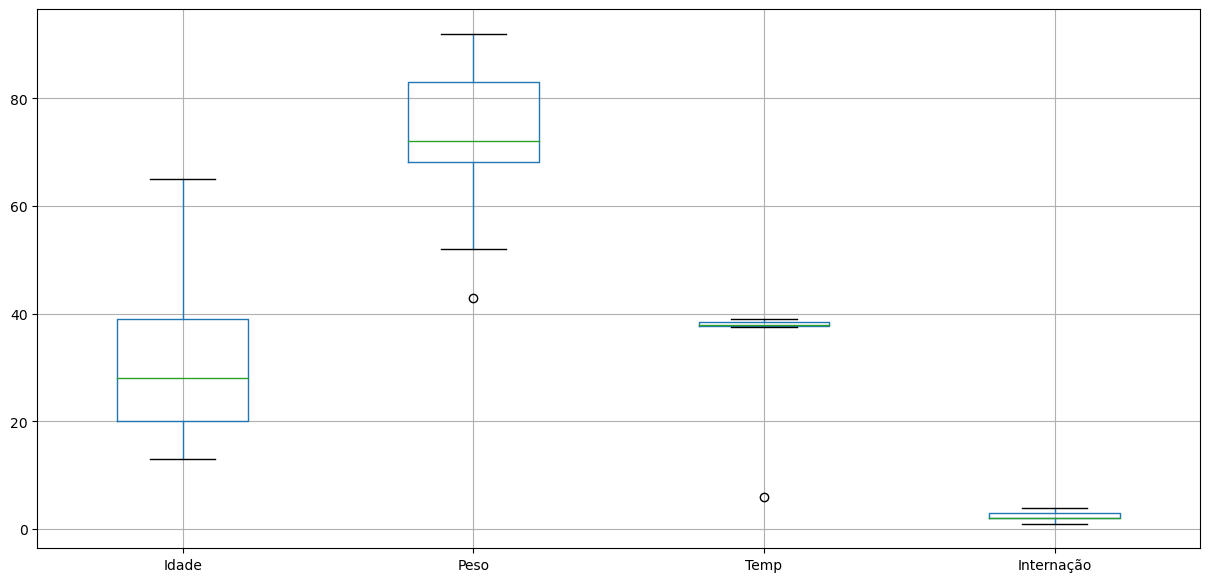

In [72]:
# gerar um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()

O box plot está indicando que os atributos `Peso` e `Temperatura` possuem *outliers*, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois tratam-se de registros com valores de atributos incorretos.

`Gráfico de dispersão`

Podemos plotar gráficos de dispersão de todas as combinações de atributos da base de dados usando a função `scatter_matrix` da biblioteca `Pandas`.

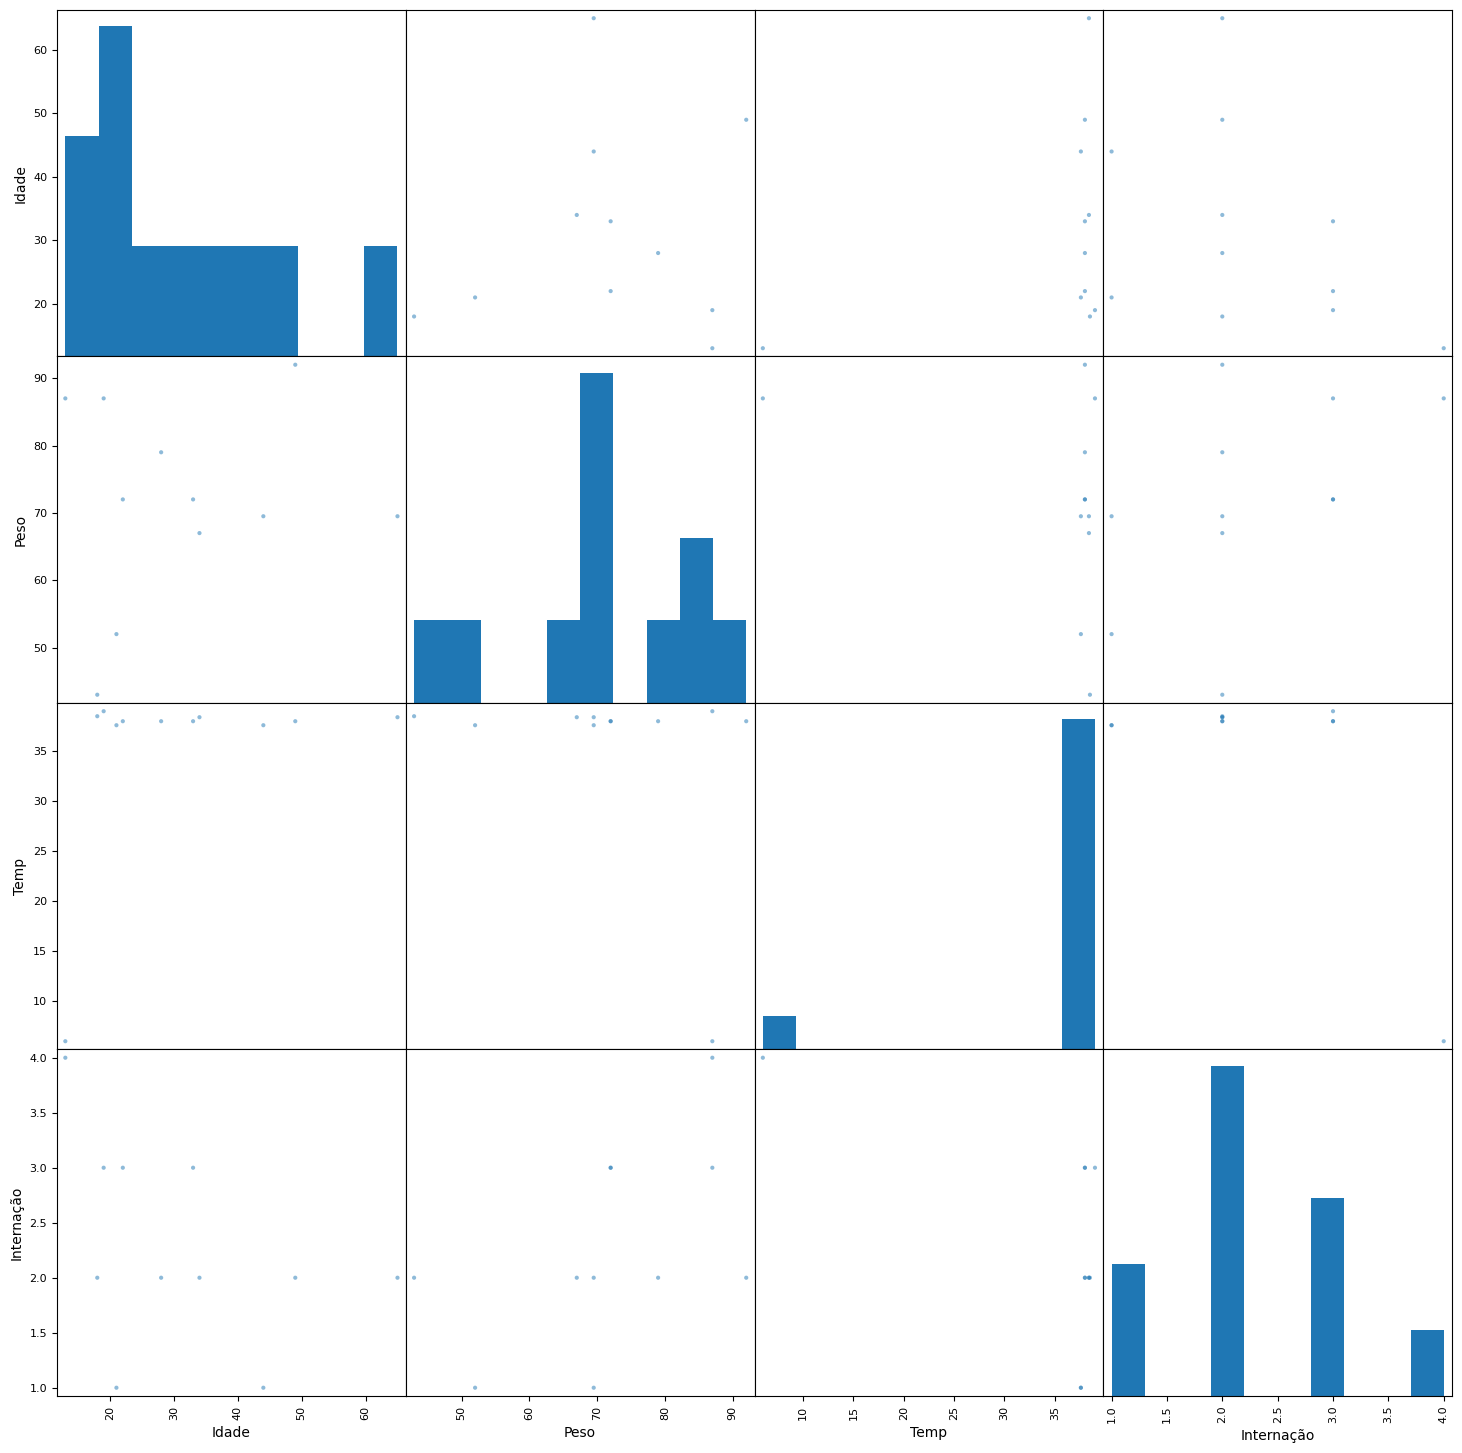

In [71]:
pd.plotting.scatter_matrix(df_dataset, figsize=(18,18))

plt.show()

Outra forma de plotar gráficos de dispersão a partir dos dataframes é usar a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos. 

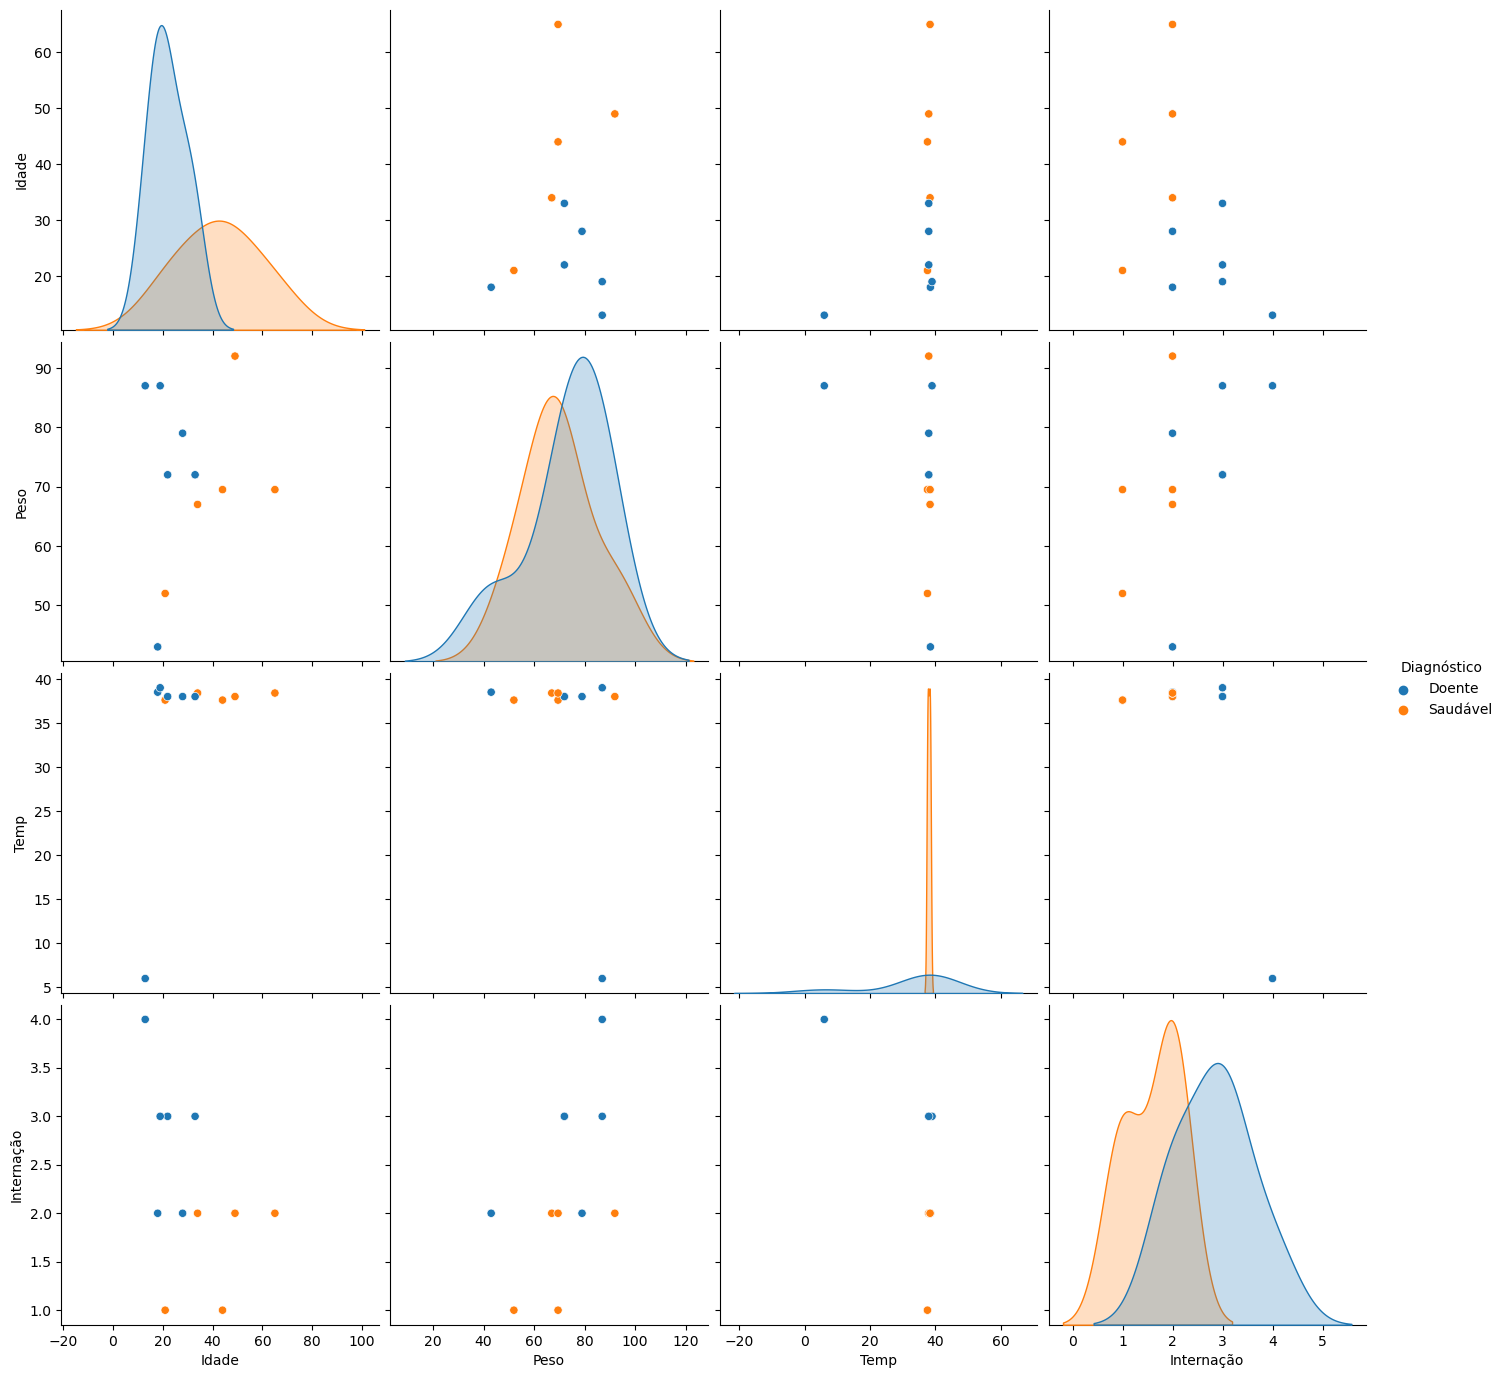

In [73]:
# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='Diagnóstico', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Observando os gráficos de dispersão, é fácil perceber que existem duas amostras da classe *Iris-virginica* que estão deslocadas no espaço em relação às demais amostras.

Pelos gráficos, os *outliers* parecem ser mais visíveis na combinação dos atributos `comprimento_sepala` e `largura_sepala`. Então, vamos usar a função `lmplot` da biblioteca `Seaborn`para visualizar a combinação desses dois atributos.

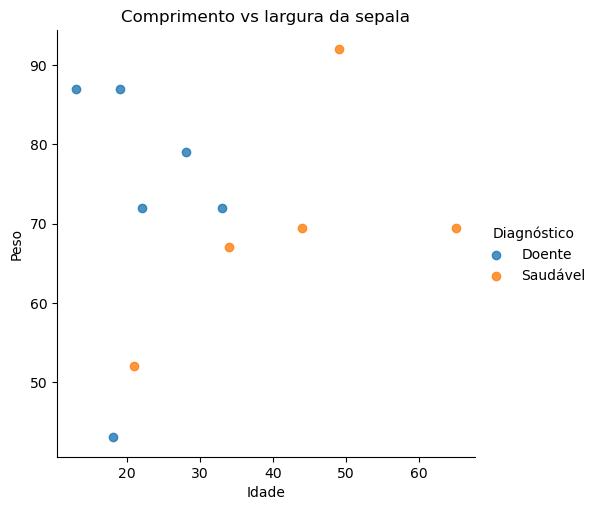

In [52]:
# define o scatter plot
sns.lmplot(x='Idade', y='Peso', data=df_dataset, 
           fit_reg=False,  
           hue='Diagnóstico')

# cria um título para o gráfico
plt.title('Comprimento vs largura da sepala')

# mostra o gráfico
plt.show()

Pelos gráficos vistos até o momento, fica claro que um dos *outliers* possui um alto valor no atributo `largura_sepala`. Já o segundo outlier contém um alto valor no atributo `comprimento_sepala`. 

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

In [74]:
for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
    plt.figure(figsize=(8,8))

    # cria o boxplot
    sns.boxplot(x="classe", y=atributo, data=df_dataset, whis=1.5)

    # mostra o gráfico
    plt.show()

ValueError: Could not interpret input 'classe'

Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, vamos usá-lo para analisar cada atributo.

In [ ]:
for atributo in df_dataset.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(df_dataset[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)

    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Nos histogramas, os *outliers* mais evidentes estão nos atributos `comprimento_sepala` e `largura_sepala`.

Agora, vamos usar um gráfico de densidade para fazer o mesmo tipo de análise.

In [ ]:
for atributo in df_dataset.columns[:-1]:

    # criando o gráfico de densidade para cada atributo
    densityplot = df_dataset[atributo].plot(kind='density')
    
    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Conforme podemos ver pelos gráficos de densidade, a maioria dos valores dos atributos `comprimento_sepala` e `largura_sepala` estão próximos de 0. Portanto, as duas amostras que contém valores próximos de 10 nesses atributos, podem ser consideradas *outliers*.

Uma das maneiras mais simples de tratar *outliers* é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$. 

Com base nessas informações, vamos usar a função abaixo para remover os *outliers* da base de dados. Usaremos como base o IQR de cada atributo em relação a todos os valores na base de dados, em vez do IQR individual de cada classe.

In [ ]:
def removeOutliers(df_dataset):
    """
    Remove os outliers da base de dados 
    """
    
    for atributo in df_dataset.columns[:-1]:

        # obtem o terceiro e o primeiro quartil. 
        q75, q25 = np.percentile(df_dataset[atributo].values, [75 ,25])
        
        # calcula o IQR
        IQR = q75 - q25

        # remove os outliers com base no valor do IQR
        df_dataset = df_dataset[ (df_dataset[atributo]<=(q75+1.5*IQR)) & (df_dataset[atributo]>=(q25-1.5*IQR)) ]
    
    return df_dataset

# remove os outliers
df_dataset = removeOutliers( df_dataset )

# apresenta as principais estatísticas sobre a base de dados
df_dataset.boxplot(figsize=(15,7))
plt.show()

# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='classe', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Depois da remoção, o box plot e os gráficos de dispersão indicam que não há mais nenhum *outlier* na base de dados. 

Com os novos gráficos de dispersão, também é possível perceber que a classe *Iris-setosa* é mais fácil de identificar, pois está mais separada no espaço de atributos. Por outro lado, em várias combinações de atributos, as classes *Iris-versicolor* e *Iris-virginica* se misturam.

**IMPORTANTE:** antes de realizar a remoção de *outliers*, é mandatório analisar cuidadosamente as características das amostras antes de removê-las. Em alguns casos, remover os *outliers* pode ser prejudicial. Além disso, algumas tarefas de aprendizado de máquina são voltadas para a detecção de *outliers* e, portanto, esses dados não podem ser removidos. Adicionalmente, se a base de dados for desbalanceada, a remoção dos *outliers* com base nas estatísticas de toda a base, pode acabar removendo amostras da classe minoritária (aquela que possui menos amostras). Ainda, alguns métodos de classificação, tais como métodos baseados em *ensemble* e métodos baseados em árvores, costumam ser robustos a *outliers*. Diante disso, em alguns problemas, é recomendável remover apenas aqueles *outliers* que são claramente erros de leitura/digitação, isto é, valores que estão fora dos limites aceitáveis para o que é esperado para um determinado atributo (por exemplo, uma pessoa com 500 anos ou um bebê com 300 kg). 

## Pré-processamento: distribuição das classes

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

In [ ]:
display( df_dataset['classe'].value_counts() )

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="classe", data=df_dataset)

# mostra o gráfico
plt.show()

Conforme podemos ver, as classes são balanceadas. Se o número de exemplos em alguma das classes fosse muito superior às demais, teríamos que usar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioira dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras. 

## Pré-processamento: correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Podemos fazer isso usando a biblioteca `Numpy` ou a `Pandas`.

Primeiro, vamos fazer usando a `Numpy`.

In [ ]:
# criando uma matriz X com os valores do data frame
X = df_dataset.iloc[:,:-1].values

# matriz de covariancia
covariance = np.cov(X, rowvar=False)

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

print('Matriz de covariância: ')
display(covariance)

print('\n\nMatriz de correlação: ')
display(correlation)

Agora, vamos calcular as matrizes de correlação e covariância usando a `Pandas`.

In [ ]:
# matriz de covariancia
df_covariance = df_dataset.cov()

# matriz de correlação
df_correlation = df_dataset.corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

Podemos ver que os atributos `comprimento_petala` e `largura_petala` possuem alta covariância e alta correlação. Se o problema que estamos analisando tivesse muitos atributos, poderíamos pensar na possibilidade de combinar esses dois atributos. Se a correlação entre dois atributos for igual a 1 ou -1, significa que eles são redundantes e um deles poderia ser eliminado.

Para facilitar a visualização, vamos plotar a matriz de covariância e a de correlação usando mapas de cores.

In [ ]:
# cria um mapa de cores dos valores da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Covariancia')
plt.show()

# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

É importante notar que a alta correlação entre dois atributos não significa que um deles influencia no valor do outro. Veja alguns exemplos que mostram isso em <http://www.tylervigen.com/spurious-correlations>.

<img src="http://tylervigen.com/correlation_project/correlation_images/number-of-people-who-tripped-over-their-own-two-feet-and-died_number-of-lawyers-in-nevada.png" width="800" align="center"/>

<img src="http://tylervigen.com/correlation_project/correlation_images/works-of-visual-art-copyrighted-us_females-in-new-york-who-slipped-or-tripped-to-their-death.png" width="800" align="center"/>


---
## Conclusão

Neste notebook, foram mostradas as principais etapas de visualização, interpretação e pré-processamento dos dados. Foi apresentado como  eliminar atributos  irrelevantes e tratar dados faltantes, redundantes ou inconsistentes. Além disso, foi mostrado como deve ser feita a normalização dos dados e quais os possíveis impactos dessa etapa no desempenho dos métodos de aprendizado. Ainda, foi mostrada uma das técnicas de remoção de outliers, como visualizar a distribuição das classes e como analisar a correlação dos atributos. Para obter maiores detalhes teóricos sobre os conceitos apresentados, consulte os Capítulos 2 (Análise de Dados) e 3 (Pré-processamento de Dados).

---
## Referências

[1] R. A. Fisher. The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936). DOI: [10.1111/j.1469-1809.1936.tb02137.x](http://dx.doi.org/10.1111/j.1469-1809.1936.tb02137.x).

---